In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
s3_path = 'https://refined-proyecto-integrador.s3.us-east-1.amazonaws.com/train_pmo_data/part-00000-4d9b5672-8998-4d4f-97f7-66bc5127142a-c000.snappy.parquet'

In [3]:
df = pd.read_parquet(s3_path)

In [4]:
df.head()

,c0,project_id,reporting_name,project_name,createdon,updated,phase,duration,effort,effort_completed,effort_remaining,finish,progress,project_manager_id,start,task_start_date,project_manager,business_unit,project_priority,portfolio,proj_issuehealthname,proj_schedulehealthname,proj_prioritizationscore,project_trend,commercial,training_billable,client,total_headcount,eho_completed,country,site,line_of_business,overall_health,num_risks,avg_risk_exposure,num_issues,avg_issue_score,num_changes,change_score,num_tasks,umap_1,umap_2,cluster,features
0,1564,8A0FA72A-11D4-EF11-A730-000D3A595F8F,DEPL DEPL Conversational AI Hiscox Voice - France,DEPL Conversational AI Hiscox Voice - France,2025-01-16,2025-04-10,(1) Create,35.0,0.0,0.0,0.0,2025-03-07,1.0,95787AB8-E36C-E911-A9CC-000D3A370F16,2025-01-15,2025-01-20,Vaidyanath Anantharaman,Global PMO,3,Deployments,(1) On Track,(1) On Track,0.0,Unchanged,False,False,None,50.0,No,France,Compiègne,None,(1) On Track,1.0,9.50,1.0,1.0,0.0,0.0,35.0,11.558146,-2.905962,1,"{'type': 1, 'size': None, 'indices': None, 'va..."
1,1339,7375A9CE-E775-4A8F-8367-6D5C5A8EA4A3,ELOG_ISA_ID_LIP_ByteDance,ELOG_ISA_ID_LIP_ByteDance,2024-07-02,2025-04-10,(5) Close,56.0,0.0,0.0,0.0,2024-09-13,1.0,70EB5B8E-F06B-E911-A9BC-000D3A3701E0,2024-07-02,2024-06-28,# Gautam,IT PMO,3,IT,(1) On Track,(1) On Track,0.0,Unchanged,False,False,None,50.0,No,Indonesia,Yogyakarta,None,(1) On Track,3.0,2.13,0.0,0.0,0.0,0.0,70.0,12.251953,1.965955,1,"{'type': 1, 'size': None, 'indices': None, 'va..."
2,903,46E9809C-FDB7-EF11-B8E9-000D3A5B8A5A,IMPL Kaizen Gamin Customer Support - ENG Fabri...,IMPL Kaizen LOB Ontario,2024-12-11,2025-05-06,(5) Close,60.0,1464.0,1464.0,0.0,2025-02-14,1.0,79AD026A-8DE0-EE11-904C-6045BD069297,2024-12-11,2024-11-25,Maria Arias Meza,Global PMO,3,Implementations,(1) On Track,(1) On Track,0.0,Unchanged,False,False,Kaizen Gamin,15.0,No,Colombia,Fabricato,Customer Support - ENG,(1) On Track,0.0,0.00,0.0,0.0,0.0,0.0,26.0,8.946021,9.932160,0,"{'type': 1, 'size': None, 'indices': None, 'va..."
3,132,7A53FFB7-F852-EF11-A316-6045BD00C974,NLOG_PH_QUE_UPAF_Upbound,NLOG_PH_QUE_UPAF_Upbound,2024-08-05,2024-11-25,(5) Close,71.0,0.0,0.0,0.0,2024-11-08,1.0,5C90C2A7-D86B-E911-A9BC-000D3A3701E0,2024-08-04,2024-08-02,Art Alcober,IT PMO,3,IT,(1) On Track,(1) On Track,0.0,Unchanged,False,False,Upbound,50.0,No,Philippines,UPA F,ACIMA / Collections,(2) At Risk,5.0,5.68,0.0,0.0,0.0,0.0,65.0,11.927172,-0.848012,1,"{'type': 1, 'size': None, 'indices': None, 'va..."
4,499,21A636EF-FA22-45D2-B60A-35E12D9A57EB,DT Flybondi - Toll Free,Flybondi - Toll Free,2024-05-22,2025-04-18,(6) Cancelled,4.0,0.0,0.0,0.0,2024-05-16,1.0,9D56A0DB-A0E0-EE11-904C-6045BD069297,2024-05-22,2024-05-13,Natalia Monsalve Mejia,Global PMO,3,Digital Transformation,(1) On Track,(1) On Track,0.0,Unchanged,False,False,Flybondi,54.0,No,Colombia,Fabricato,Airlines,(1) On Track,0.0,0.00,0.0,0.0,0.0,0.0,1.0,11.982899,14.235625,0,"{'type': 1, 'size': None, 'indices': None, 'va..."


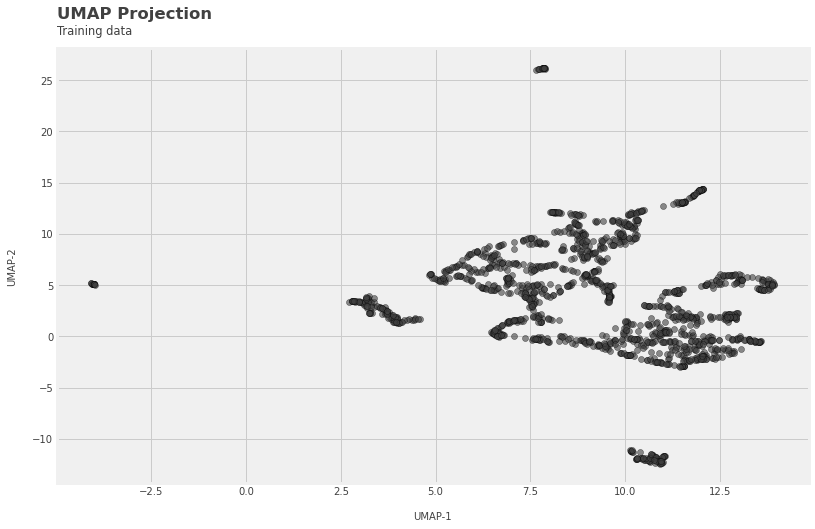

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(df['umap_1'], df['umap_2'], alpha=0.6, edgecolor='k', color = '#414141')

plt.ylabel('UMAP-2', fontsize = 10, color = '#414141',labelpad = 15)
plt.xlabel('UMAP-1', fontsize = 10, color = '#414141',labelpad = 15)

plt.yticks( fontsize = 10, color = '#414141');
plt.xticks( fontsize = 10, color = '#414141');


plt.text(x=-5., y=31, s = "UMAP Projection", fontsize = 16.5, fontweight = 'bold', color = '#414141')
plt.text(x=-5, y=29.5, s = "Training data", fontsize = 11.5,  color = '#414141')

plt.show()

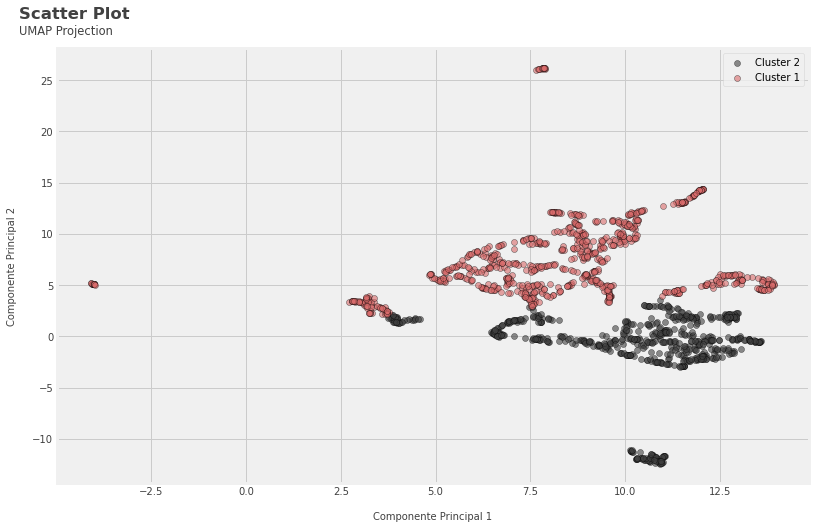

In [33]:
colores = ['#DA6C6C', '#414141'] 

plt.figure(figsize=(12, 8))

for c in df['cluster'].unique():
    cluster_data = df[df['cluster'] == c]
    plt.scatter(
        cluster_data['umap_1'], 
        cluster_data['umap_2'], 
        color=colores[c],
        alpha=0.6,
        edgecolor='k',
        label=f'Cluster {c+1}' 
    )

plt.text(x=-6, y=31, s="Scatter Plot", fontsize=16.5, fontweight='bold', color='#414141')
plt.text(x=-6, y=29.5, s="UMAP Projection", fontsize=11.5, color='#414141')

plt.xlabel('Componente Principal 1', fontsize=10, color='#414141', labelpad=15)
plt.ylabel('Componente Principal 2', fontsize=10, color='#414141', labelpad=15)

plt.xticks(fontsize=10, color='#414141')
plt.yticks(fontsize=10, color='#414141')

plt.legend(loc='upper right', fancybox=True, fontsize=10)
plt.grid(True)
plt.show()